Import neccessary packages

In [25]:
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

Importing the data scraped online

In [2]:
data = pd.read_csv("NBA Players Info 2018.csv")
data.head()

,Name,PPG,AST,BLK,TO,STL,REB,OREB,DREB,GP,...,3P,3P%,FTA,FT,FT%,2PA,2P,2P%,EFG%,Salary
0,Stephen Curry,23.1,6.8,0.2,3.2,1.8,4.4,0.7,3.7,625,...,3.4,0.436,4.0,3.6,0.903,9.0,4.6,0.513,0.579,37457154
1,Chris Paul,18.7,9.8,0.1,2.4,2.3,4.5,0.7,3.8,892,...,1.3,0.372,4.9,4.3,0.868,10.5,5.3,0.505,0.518,35654150
2,LeBron James,27.2,7.2,0.8,3.5,1.6,7.4,1.2,6.1,1143,...,1.4,0.344,8.1,6.0,0.739,15.5,8.5,0.547,0.540,35654150
3,Russell Westbrook,23.0,8.2,0.3,4.0,1.7,6.6,1.7,4.9,748,...,1.1,0.311,7.2,5.9,0.814,15.0,6.9,0.464,0.464,35350000
4,Blake Griffin,21.5,4.3,0.5,2.5,0.9,9.2,2.3,6.9,529,...,0.4,0.324,6.9,4.7,0.683,15.0,7.8,0.522,0.519,31873932


Will plot the Salary target against some features

In [6]:
x1 = np.array(data.PPG) #Points per game
x2 = np.array(data.GP) #Games Played in career
x3 = np.array(data.BLK) #Blocks per Game
x4 = np.array(data[["EFG%"]]) #EFG%

y = np.array(data.Salary) #Salary for each player

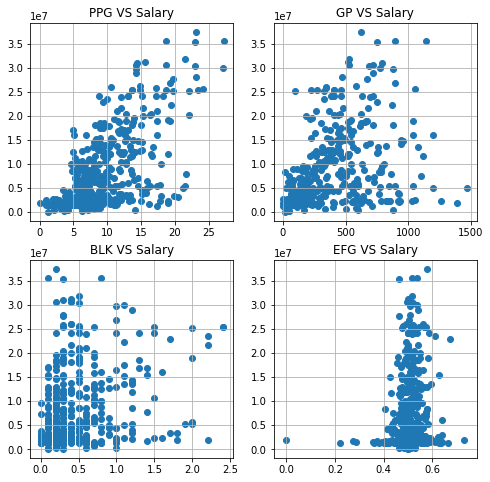

In [14]:
fig = plt.figure(figsize=(8,8))

fig1 = fig.add_subplot(2, 2, 1)
fig1.scatter(x1, y)
fig1.grid(True)
fig1.set_title("PPG VS Salary")


fig2 = fig.add_subplot(2, 2, 2)
fig2.scatter(x2, y)
fig2.grid(True)
fig2.set_title("GP VS Salary")

fig3 = fig.add_subplot(2, 2, 3)
fig3.scatter(x3, y)
fig3.grid(True)
fig3.set_title("BLK VS Salary")

fig4 = fig.add_subplot(2, 2, 4)
fig4.scatter(x4, y)
fig4.grid(True)
fig4.set_title("EFG VS Salary")

plt.show()

The plot that looks like it predicts the best is "PPG vs Salary"
Looks like it would best fit a linear model

In [15]:
x = np.array(data.PPG)
y = np.array(data.Salary)

In [20]:
def lin_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)

    sxx = np.mean((xbar - x)**2)
    syy = np.mean((ybar - y)**2)
    sxy = np.mean((x - xbar)*(y - ybar))

    beta1 = sxy / sxx
    beta0 = ybar - (beta1 * xbar)
    
    rsq = 1
    return beta0, beta1, rsq

In [22]:
beta0, beta1, rsq = lin_regression(x, y)
print(beta0, beta1)

-1377550.9492065813 1029781.5842224403


\begin{equation}
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}

\begin{equation}
\beta_0 = -1377550.9492065813
\end{equation}

\begin{equation}
\beta1 = 1029781.5842224403
\end{equation}


\begin{equation}
Y_i \approx -1377550.9492065813 + 1029781.5842224403 X_i
\end{equation}

In [23]:
predictions = np.array(beta0 + (beta1 * x))

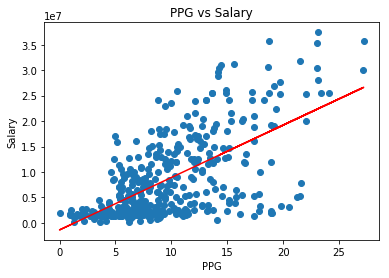

In [27]:
plt.scatter(x, y)
plt.title("PPG vs Salary")
plt.xlabel("PPG")
plt.ylabel("Salary")

plt.plot(x, predictions, color="red")

In [26]:
print("Mean absolute error:", mean_absolute_error(predictions, y))

Mean absolute error: 4715627.216595057
